In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
plt.ion()
class DynamicUpdate():
    def on_launch(self):
        #Set up plot
        self.figure, self.ax = plt.subplots()
        self.lines, = self.ax.plot([],[])
        #Autoscale on unknown axis and known lims on the other
        self.ax.set_autoscaley_on(True)
        self.ax.set_autoscalex_on(True)
        #Other stuff
        self.ax.grid()

    def on_running(self, xdata, ydata):
        #Update data (with the new _and_ the old points)
        self.lines.set_xdata(xdata)
        self.lines.set_ydata(ydata)
        #Need both of these in order to rescale
        self.ax.relim()
        self.ax.autoscale_view()
        #We need to draw *and* flush
        self.figure.canvas.draw()
        self.figure.canvas.flush_events()

In [3]:
import numpy as np
import random
from time import sleep

<IPython.core.display.Javascript object>


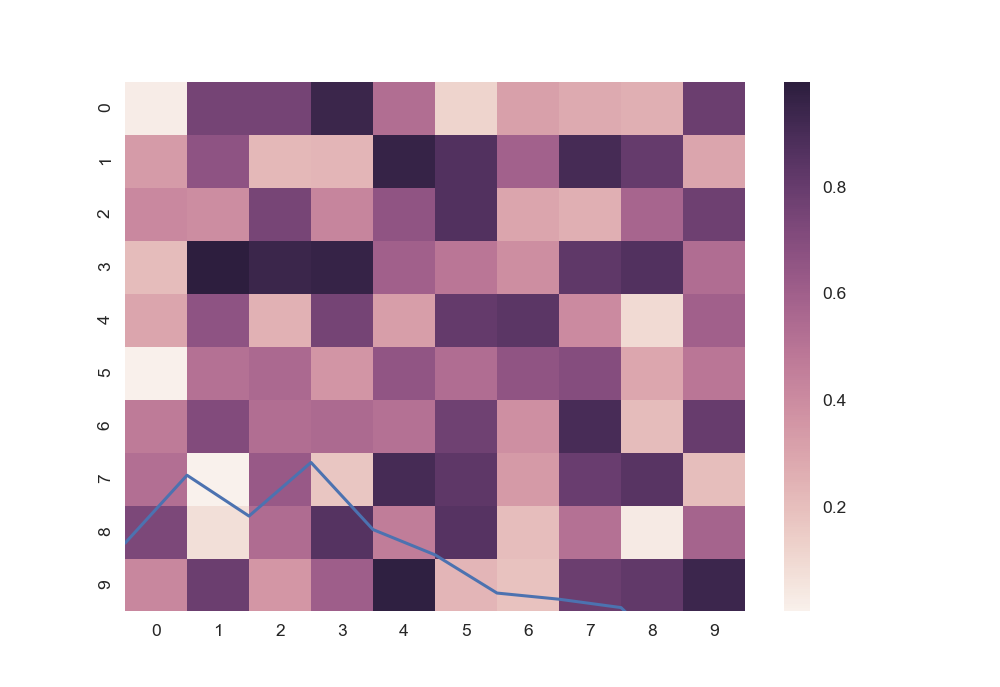

In [15]:
y = 0.0
xx = []
yy = []

d = DynamicUpdate()
d.on_launch()

for x in range(100):
    y += random.normalvariate(0, 1)
    xx.append(x)
    yy.append(y)
    sleep(0.01)
    
    if x % 10 == 0:
        d.on_running(xx, yy)

In [7]:
import seaborn as sns

In [16]:
sns.heatmap(np.random.random(100).reshape(10, 10))